## Amplitude modulation
We will implement an ideal amplitude modulation and demodulation process in python.



In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft,rfft,fftfreq,rfftfreq,ifft
%matplotlib inline

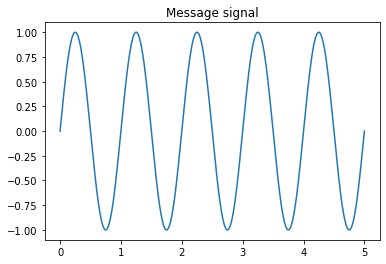

In [62]:
sr = 1*10**6

msg_t = np.linspace(0,5,5*sr)
msg_f = 1 #Hz

msg_y = np.sin(2*np.pi*msg_f*msg_t)

fig,ax = plt.subplots(1,1)
ax.plot(msg_t,msg_y)
plt.title("Message signal")
plt.show()



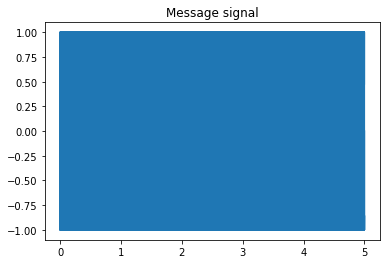

In [63]:
#carrier signal
car_f = 1*10**3 #Hz
car_y = np.sin(2*np.pi*car_f*msg_t)

fig,ax = plt.subplots(1,1)
ax.plot(msg_t,car_y)
plt.title("Message signal")
plt.show()

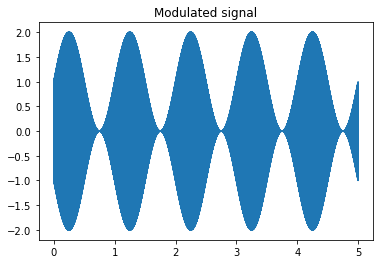

In [64]:
#modulation
mod_y = (1+msg_y)*car_y

fig,ax = plt.subplots(1,1)
ax.plot(msg_t,mod_y)
plt.title("Modulated signal")
plt.show()

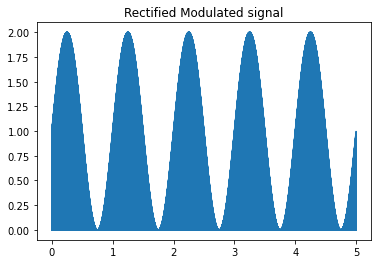

In [65]:
#demodulation

rectified = mod_y * (mod_y>0)
fig,ax = plt.subplots(1,1)
ax.plot(msg_t,rectified)
plt.title("Rectified Modulated signal")
plt.show()

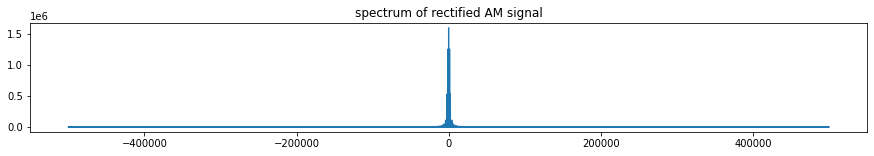

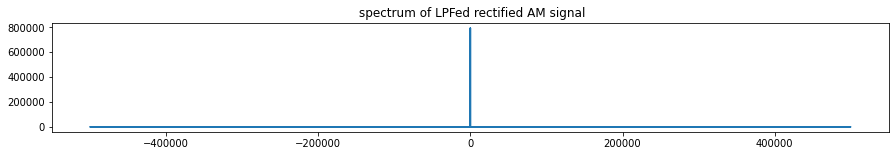

In [66]:
#filter high freq and remove DC
f_y = fft(rectified)
f_x = fftfreq(len(rectified),1/sr)


fig,ax = plt.subplots(1,figsize=(15,2))
ax.plot(f_x,np.abs(f_y))
#ax.plot(xf[len(xf)//2-2000:len(xf)//2+2000],np.abs(yf[len(xf)//2-2000:len(xf)//2+2000]))
plt.title("spectrum of rectified AM signal")
plt.show()

filtered = f_y * (np.abs(f_x)<150) * (0<np.abs(f_x))



fig,ax = plt.subplots(1,figsize=(15,2))
ax.plot(f_x,np.abs(filtered))
#ax.plot(xf[len(xf)//2-2000:len(xf)//2+2000],np.abs(yf[len(xf)//2-2000:len(xf)//2+2000]))
plt.title(" spectrum of LPFed rectified AM signal")
plt.show()


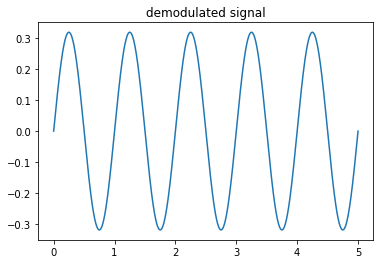

In [67]:
#time domain
demod_y = ifft(filtered)
fig,ax = plt.subplots(1,1)
ax.plot(msg_t,demod_y)
plt.title("demodulated signal")
plt.show()